In [7]:
import pandas as pd # импорт pandas

In [8]:
df = pd.read_excel("USD.xlsx") # переменная для считывания данных

In [9]:
money = df["curs"] # переменная для стобца курс

In [10]:
money

0      59.8961
1      59.9533
2      60.1614
3      59.4978
4      59.3700
        ...   
715    64.0239
716    63.9722
717    64.1005
718    64.0817
719    64.4097
Name: curs, Length: 720, dtype: float64

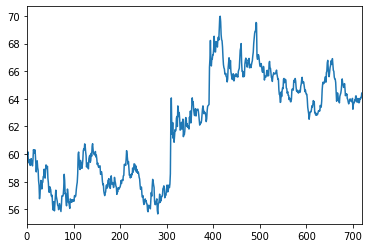

In [12]:
money.plot() # график динамики курса за 720 дней

In [13]:
past = 7 * 4 # возьмем данные за последние четыре недели
future = 7 # попытаемся предсказать значения на неделю в будущее

In [10]:
money.head(50) # данные за первые 50 дней

0     59.8961
1     59.9533
2     60.1614
3     59.4978
4     59.3700
5     59.6067
6     59.4015
7     59.1830
8     59.3521
9     59.6697
10    59.5034
11    59.2168
12    59.1489
13    59.6356
14    60.3196
15    60.1618
16    60.0851
17    60.3099
18    59.9858
19    59.3137
20    58.7121
21    59.1933
22    59.5129
23    59.0235
24    58.8457
25    58.0619
26    57.7388
27    56.7719
28    57.1507
29    57.6342
30    58.0967
31    57.8590
32    57.4762
33    57.9371
34    57.9627
35    58.3776
36    58.4067
37    58.9099
38    58.3370
39    58.2630
40    58.8318
41    59.2174
42    59.1327
43    58.9540
44    59.1128
45    58.2437
46    57.9344
47    57.2847
48    57.2323
49    57.6360
Name: curs, dtype: float64

In [14]:
start = past
end = len(money) - future

In [15]:
money[100]

56.6747

In [16]:
money[72:100]

72    56.0794
73    55.8453
74    56.3131
75    56.9707
76    56.9838
77    56.9518
78    57.0927
79    57.5714
80    58.5382
81    58.0824
82    57.1161
83    57.1640
84    56.5258
85    56.2603
86    56.7383
87    57.4683
88    57.1602
89    56.4988
90    56.5552
91    56.2743
92    56.0701
93    56.7560
94    56.7106
95    56.5168
96    56.6876
97    56.5373
98    56.6876
99    56.6152
Name: curs, dtype: float64

In [17]:
raw_df = [] # массив для хранения данных за 28 дней до и 7 дней после
for i in range(start, end):
    past_and_future_values = money[(i - past): (i + future)]
    raw_df.append(list(past_and_future_values))

In [18]:
len(raw_df)

685

In [19]:
len(raw_df[0])

35

In [20]:
past_columns = []
for i in range(past):
        past_columns.append("past_{}".format(i))

In [21]:
past_columns

['past_0',
 'past_1',
 'past_2',
 'past_3',
 'past_4',
 'past_5',
 'past_6',
 'past_7',
 'past_8',
 'past_9',
 'past_10',
 'past_11',
 'past_12',
 'past_13',
 'past_14',
 'past_15',
 'past_16',
 'past_17',
 'past_18',
 'past_19',
 'past_20',
 'past_21',
 'past_22',
 'past_23',
 'past_24',
 'past_25',
 'past_26',
 'past_27']

In [22]:
future_columns = []
for i in range(future):
        future_columns.append("future_{}".format(i))

In [23]:
future_columns

['future_0',
 'future_1',
 'future_2',
 'future_3',
 'future_4',
 'future_5',
 'future_6']

In [24]:
df = pd.DataFrame(raw_df, columns = (past_columns+future_columns))

In [25]:
df # итоговый датафрейм, где разложены данные для каждой позиции за 28 дней в прошлом и 7 дней в будущем

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,...,past_25,past_26,past_27,future_0,future_1,future_2,future_3,future_4,future_5,future_6
0,59.8961,59.9533,60.1614,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,...,58.0619,57.7388,56.7719,57.1507,57.6342,58.0967,57.8590,57.4762,57.9371,57.9627
1,59.9533,60.1614,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,...,57.7388,56.7719,57.1507,57.6342,58.0967,57.8590,57.4762,57.9371,57.9627,58.3776
2,60.1614,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,59.2168,...,56.7719,57.1507,57.6342,58.0967,57.8590,57.4762,57.9371,57.9627,58.3776,58.4067
3,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,59.2168,59.1489,...,57.1507,57.6342,58.0967,57.8590,57.4762,57.9371,57.9627,58.3776,58.4067,58.9099
4,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,59.2168,59.1489,59.6356,...,57.6342,58.0967,57.8590,57.4762,57.9371,57.9627,58.3776,58.4067,58.9099,58.3370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,64.8259,64.8672,65.0976,64.7416,64.2237,64.3652,64.2548,64.3455,64.0144,63.9542,...,63.8530,64.2009,64.2101,63.8881,63.7542,63.7730,64.0213,63.8430,63.7101,63.7637
681,64.8672,65.0976,64.7416,64.2237,64.3652,64.2548,64.3455,64.0144,63.9542,63.7606,...,64.2009,64.2101,63.8881,63.7542,63.7730,64.0213,63.8430,63.7101,63.7637,64.0239
682,65.0976,64.7416,64.2237,64.3652,64.2548,64.3455,64.0144,63.9542,63.7606,63.6336,...,64.2101,63.8881,63.7542,63.7730,64.0213,63.8430,63.7101,63.7637,64.0239,63.9722
683,64.7416,64.2237,64.3652,64.2548,64.3455,64.0144,63.9542,63.7606,63.6336,63.7997,...,63.8881,63.7542,63.7730,64.0213,63.8430,63.7101,63.7637,64.0239,63.9722,64.1005


In [26]:
# Учебник
# тренировочная выборка
X = df[past_columns] [:-20] # данные на вход ("Задачи")
Y = df[future_columns] [:-20] # данные на выход ("Ответы")

In [27]:
# Экзамен
X_test = df[past_columns] [-20:] # задачи
Y_test = df[future_columns] [-20:]  # ответы

In [28]:
# импорт линейной регрессии (https://clck.ru/JT8wR) / (https://clck.ru/KfQon)
from sklearn.linear_model import LinearRegression

In [29]:
LinReg = LinearRegression() # алиас для удобства

In [30]:
LinReg.fit(X, Y) # запуск обучения

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
prediction = LinReg.predict(X_test) # предсказание

In [32]:
prediction # prediction

array([[63.83147303, 63.86124819, 63.84828677, 63.76803891, 63.88800982,
        63.94152217, 63.95378869],
       [63.90343602, 63.92438152, 63.84232691, 63.94637983, 63.99406002,
        64.00309225, 63.94930708],
       [64.03495878, 63.97386993, 64.07288314, 64.10656639, 64.1143168 ,
        64.05503807, 63.95640988],
       [63.79138185, 63.89402494, 63.93757425, 63.95186316, 63.88602005,
        63.79653703, 63.76318082],
       [63.92340977, 63.91573466, 63.92824424, 63.88194806, 63.80461259,
        63.77206718, 63.78307829],
       [63.8660711 , 63.90220633, 63.85815518, 63.77363541, 63.73619972,
        63.74803688, 63.73365847],
       [63.79073768, 63.7160369 , 63.63706223, 63.61721702, 63.63271799,
        63.6249561 , 63.56453433],
       [63.99851077, 63.95215522, 63.92132615, 63.90846926, 63.89771011,
        63.82665448, 63.73508628],
       [63.12804836, 63.17375373, 63.19499092, 63.19604855, 63.09665629,
        63.0301849 , 63.14895532],
       [63.68289117, 63.6726

In [33]:
prediction[19] # предсказание для 19 дня

array([64.01321109, 63.95959729, 63.94023366, 63.97910219, 63.96984916,
       64.00732396, 63.96761631])

In [34]:
Y_test[-1:] # ответы из экзамена для 19 дня (реальные данные)

,future_0,future_1,future_2,future_3,future_4,future_5,future_6
684,63.843,63.7101,63.7637,64.0239,63.9722,64.1005,64.0817


In [35]:
import matplotlib.pyplot as plt # импорт pyplot для построения графика

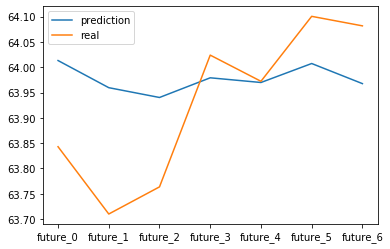

In [36]:
def plotChart(prediction): # функция построения графика
    plt.plot(prediction[19], label = "prediction") # линейный график предсказания для 19 дня
    plt.plot(Y_test[-1:].iloc[0], label = "real") # линейный график реальных данных для 19 дня
    plt.legend() # отобразить легенду
''' Простой алгорит линейной регрессии без найстройки предсказал 5 трендов из 6 для 19 дня'''
plotChart(prediction)

In [37]:
from sklearn.metrics import mean_absolute_error # импорт средней абсолютной ошибки

In [38]:
mean_absolute_error(Y_test[-1:].iloc[0], prediction[19]) # рассчет средней абсолютной ошибки для 19 дня (12 копеек)

0.12152148942502704

In [39]:
def printErrors(prediction): # функция вывода ошибок
    errors_list = [] # создание массива средней абсолютной ошибки для всех 20 дней
    for i in range(len(prediction)):
        error = mean_absolute_error(Y_test.iloc[0], prediction[i])
        errors_list.append(error)
    avg_err = sum(errors_list) / len(errors_list) # среднее значение средней абсолютной ошибки для всех 20 дней (18 копеек)
    sum_err = sum(errors_list) # суммарная ошибка за 20 дней
    max_err = max(errors_list) # максимальная ошибка за 20 дней
    print("Средняя ошибка = {}".format(avg_err),"рублей")
    print("Максимальная ошибка = {}".format(max_err),"рублей")
    print("Суммарная ошибка = {}".format(sum_err),"рублей")

In [40]:
printErrors(prediction)

Средняя ошибка = 0.18030854347113812 рублей
Максимальная ошибка = 0.7528231309996727 рублей
Суммарная ошибка = 3.6061708694227623 рублей


In [41]:
from sklearn.neural_network import MLPRegressor # импорт MLPRegressor

In [42]:
MLP = MLPRegressor(max_iter=420) # алиас для удобства, количество интераций 420

In [43]:
MLP.fit(X,Y) # запуск обучения

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (420) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=420, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [44]:
predictionMLP = MLP.predict(X_test) # предсказание по MLP 

In [45]:
predictionMLP # предсказание по MLP 

array([[64.42354021, 63.89733835, 64.85277465, 64.41944822, 64.04198899,
        64.69087913, 64.57185722],
       [64.35230056, 63.95127749, 64.98345614, 64.55295313, 64.40910775,
        64.44300832, 64.68825572],
       [64.68499901, 64.10277777, 64.92976004, 64.52571712, 64.33249542,
        64.53630738, 64.74789742],
       [64.88204583, 64.55681761, 64.78326652, 64.40372029, 64.09893806,
        64.35157049, 64.73604079],
       [64.89709794, 64.32371515, 64.80498297, 64.26368696, 64.09388113,
        64.19599607, 64.63147285],
       [64.74172344, 64.23371959, 64.77524089, 64.02763596, 64.23386241,
        64.04747074, 64.48404926],
       [64.49819403, 64.17447441, 64.93716882, 63.97475012, 64.34595242,
        63.88987425, 64.46848507],
       [64.48430315, 64.4270341 , 64.91819497, 63.96520014, 64.24469312,
        64.10323233, 64.37041641],
       [64.33497419, 64.73674799, 64.62163449, 63.73561291, 64.25648842,
        64.18100596, 64.35166747],
       [64.42238242, 64.6187

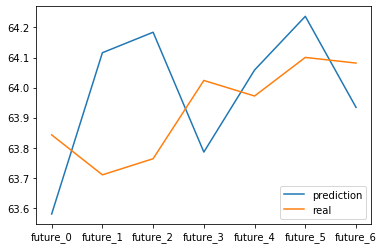

In [46]:
plotChart(predictionMLP) # график предсказания по MLP 

In [47]:
printErrors(predictionMLP) # вывод ошибок для MLP

Средняя ошибка = 0.4417056338069865 рублей
Максимальная ошибка = 0.660222024015205 рублей
Суммарная ошибка = 8.83411267613973 рублей


In [48]:
from sklearn.neighbors import KNeighborsRegressor # импорт метода ближайших соседей (https://clck.ru/KfYop)

In [49]:
KNN = KNeighborsRegressor(n_neighbors=25) # алиас для удобства, количество соседей 25

In [50]:
KNN.fit(X, Y) # запуск обучения

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                    weights='uniform')

In [51]:
predictionKNN = KNN.predict(X_test) # предсказание по KNN

In [52]:
predictionKNN # предсказание по KNN

array([[64.032376, 64.099256, 64.196044, 64.306664, 64.379972, 64.424676,
        64.420376],
       [64.025348, 64.108012, 64.218076, 64.313204, 64.378608, 64.398228,
        64.37642 ],
       [64.073916, 64.175984, 64.287916, 64.370056, 64.424536, 64.420024,
        64.405348],
       [64.173208, 64.287244, 64.402432, 64.459468, 64.452756, 64.439612,
        64.405836],
       [64.185208, 64.293892, 64.379724, 64.400516, 64.377244, 64.352984,
        64.287832],
       [64.196252, 64.295948, 64.352304, 64.351048, 64.32102 , 64.292852,
        64.209404],
       [64.186452, 64.272104, 64.277012, 64.240796, 64.202908, 64.164936,
        64.098896],
       [63.993756, 63.999604, 64.001548, 63.983264, 63.97666 , 63.928572,
        63.880532],
       [63.866344, 63.86926 , 63.880328, 63.87878 , 63.865932, 63.8301  ,
        63.801056],
       [63.791684, 63.798852, 63.805804, 63.808188, 63.771636, 63.746596,
        63.716556],
       [63.798852, 63.805804, 63.808188, 63.771636, 63.74659

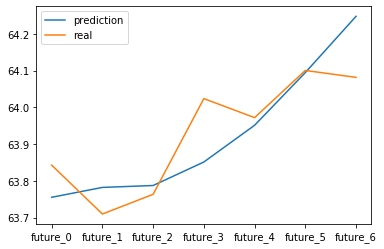

In [53]:
plotChart(predictionKNN) # график предсказания по KNN

In [54]:
printErrors(predictionKNN) # вывод ошибок для KNN

Средняя ошибка = 0.2519098857142833 рублей
Максимальная ошибка = 0.48316514285713297 рублей
Суммарная ошибка = 5.0381977142856655 рублей


In [55]:
# Кросс-валидация
from sklearn.model_selection import GridSearchCV

In [59]:
import numpy as np # импорт numpy

In [60]:
np.linspace(10, 5000, 50) # создает список из элементов межу a1 до a2 с интервалом a3

array([  10.        ,  111.83673469,  213.67346939,  315.51020408,
        417.34693878,  519.18367347,  621.02040816,  722.85714286,
        824.69387755,  926.53061224, 1028.36734694, 1130.20408163,
       1232.04081633, 1333.87755102, 1435.71428571, 1537.55102041,
       1639.3877551 , 1741.2244898 , 1843.06122449, 1944.89795918,
       2046.73469388, 2148.57142857, 2250.40816327, 2352.24489796,
       2454.08163265, 2555.91836735, 2657.75510204, 2759.59183673,
       2861.42857143, 2963.26530612, 3065.10204082, 3166.93877551,
       3268.7755102 , 3370.6122449 , 3472.44897959, 3574.28571429,
       3676.12244898, 3777.95918367, 3879.79591837, 3981.63265306,
       4083.46938776, 4185.30612245, 4287.14285714, 4388.97959184,
       4490.81632653, 4592.65306122, 4694.48979592, 4796.32653061,
       4898.16326531, 5000.        ])

In [61]:
# GridSearch
# CV - cross validation
MLP = MLPRegressor()

In [62]:
MLP

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [93]:
GS = GridSearchCV(MLP, {
    "max_iter": np.linspace(100, 1000, 4, dtype = np.int16), # количество итераций, должно быть целым числов(dtype = np.int16)
    "hidden_layer_sizes": [ (50,50), (100,100), (50,50,50)] # количество скрытых слоев (слой (количество нейронов))
}, cv = 2, scoring = 'neg_mean_squared_error') # оценка ошибки = метод среднеквадратичиной ошибки
# создаст 54 модели (2 act * 3 iter * 3 cv * 3 hidden_layer_sizes )

In [94]:
GS.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_iter=200,
                                    momentum=0.9, n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=None, shuffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'hidden_layer_sizes': [(50, 50), (100, 100),
        

In [95]:
GS.best_estimator_ # лучшая получившаеся модель

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_iter=700, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [96]:
GS.best_score_ # лучшая оценка ошибки

-1.2402584286646636

In [97]:
BestMLP = GS.best_estimator_ 

In [98]:
prediction = BestMLP.predict(X_test) # предсказание по лучшей модели

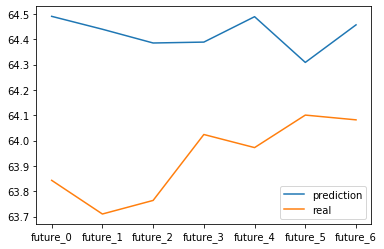

In [99]:
plotChart(prediction) # график предсказания по лучшей модели

In [100]:
printErrors(prediction) # вывод ошибок для лучшей модели

Средняя ошибка = 0.405292907254727 рублей
Максимальная ошибка = 0.6267411103063927 рублей
Суммарная ошибка = 8.10585814509454 рублей
